In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("./Data/loan_data_set.csv")

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# -->EDA (Exploratory Data Analysis)

- Exploring column one by one

<AxesSubplot:>

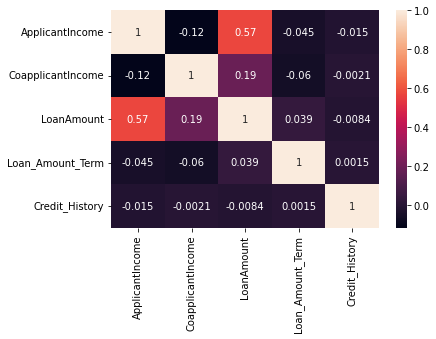

In [9]:
sns.heatmap(df.corr(), annot = True)

## 1. Loan_ID
- This feature is just id and not going to help us predict target feature

In [10]:
df['Loan_ID'].isna().any()

False

## 2. Gender
- There is 13 NaN values in this feature
- The ratio of Female approved loans are same(nearly) as Male 

In [11]:
df['Gender'].value_counts(dropna = False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

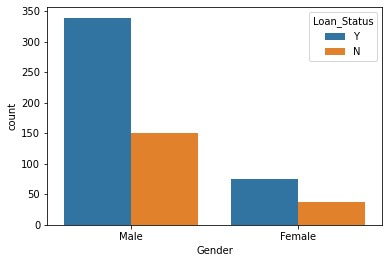

In [12]:
sns.countplot(x = df['Gender'], hue = df['Loan_Status'])

## 3. Married
- 3 NaN values
- The probability of getting loan is greater if Applicant is married

In [ ]:
df['Married'].value_counts(dropna = False)

In [ ]:
sns.countplot(x = df['Married'], hue = df['Loan_Status'])

## 4. Dependents
- There is 15 NaN value

In [ ]:
df['Dependents'].value_counts(dropna = False)

In [ ]:
sns.countplot(x = df['Dependents'], hue = df['Loan_Status'])

In [ ]:
sns.countplot(x = df['Dependents'], hue = df['Married'])

## 5. Education
- No NaN value
- The probability of getting loan approval is heigher if applicant is graduated

In [ ]:
df['Education'].value_counts(dropna = False)

In [ ]:
sns.countplot(x = df['Education'], hue = df['Loan_Status'])

## 6. Self_Employed
- 32 NaN values

In [ ]:
df['Self_Employed'].value_counts(dropna = False)

In [ ]:
sns.countplot(x = df['Self_Employed'], hue = df['Loan_Status'])

## 7. ApplicantIncome
- 0 NaN values
- ApplicantIncome and LoanAmount features are correlated

In [ ]:
df[df['ApplicantIncome'].isna() == True]

In [ ]:
plt.figure(figsize = (13, 6))
sns.scatterplot(x = df['ApplicantIncome'], y = df['LoanAmount'], hue = df['Loan_Status'])

In [ ]:
sns.jointplot(x = df['ApplicantIncome'], y = df['LoanAmount'], kind = 'hex', 
              xlim = (-1000, 10000), ylim = (-50, 250))

In [ ]:
sns.jointplot(x = df['ApplicantIncome'], y = df['LoanAmount'], kind = 'reg')

## 8. CoapplicantIncome
- 0 NaN value
- Many Co-applicant Income is 0 because many applicant have no co-applicant so instead of NaN value it is 0.
- So if we add applicant Income and Coapplicant Income we get total income

In [ ]:
df[df['CoapplicantIncome'].isna() == True]

In [ ]:
plt.figure(figsize = (13, 6))
sns.scatterplot(x = df['CoapplicantIncome'], y = df['LoanAmount'], hue = df['Loan_Status'])

In [ ]:
plt.figure(figsize = (13, 6))
sns.scatterplot(x = df['CoapplicantIncome'] + df['ApplicantIncome'], y = df['LoanAmount'], hue = df['Loan_Status'])

In [ ]:
plt.figure(figsize = (13, 6))
sns.jointplot(x = df['CoapplicantIncome'] + df['ApplicantIncome'], y = df['LoanAmount'], kind = 'reg')

## 9. LoanAmount
- 22 NaN values

In [ ]:
df['LoanAmount'].isna().sum()

In [ ]:
sns.boxplot(y = df['LoanAmount'], x = df['Education'])

In [ ]:
sns.boxplot(y = df['LoanAmount'], x = df['Gender'])

## 10. Loan_Amount_Term (Term of Loan in months)
- 14 NaN values

In [ ]:
df['Loan_Amount_Term'].isna().sum()

In [ ]:
df['Loan_Amount_Term'].value_counts()

## 11. Credit_History
- 50 NaN value

In [ ]:
df['Credit_History'].value_counts(dropna = False)

In [ ]:
sns.countplot(x = df['Credit_History'], hue = df['Loan_Status'])

## 12. Property_Area
- 0 NaN value

In [ ]:
df['Property_Area'].value_counts(dropna = False)

In [ ]:
sns.countplot(x = df['Property_Area'], hue = df['Loan_Status'])

# --> Handling NaN values

## Test and Train Split
- Before Handlind NaN values we are going to split the data because of data leakage

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

## 1. Gender
- if the applicant is married there is a high chance of male applicant
- Mode of Gender variable is 'Male'

In [ ]:
sns.countplot(x = X_train['Married'], hue = X_train['Gender'])

In [ ]:
X_train[X_train['Gender'].isna() == True]['Married'].value_counts(dropna = False)

In [ ]:
X_train['Gender'] = X_train['Gender'].fillna('Male')
X_test['Gender'] = X_test['Gender'].fillna('Male')

## 2. Married

In [ ]:
X_train['Married'].value_counts(dropna = False)

In [ ]:
X_train['Married'] = X_train['Married'].fillna(X_train['Married'].mode()[0])
X_test['Married'] = X_test['Married'].fillna(X_train['Married'].mode()[0])

## 3. Dependents
- Mode of Dependents feature is '0'

In [ ]:
X_train['Dependents'].value_counts(dropna = False)

In [ ]:
X_train[X_train['Dependents'].isna() == True]['Married'].value_counts(dropna = False)

In [ ]:
sns.countplot(x = df['Dependents'], hue = df['Married'])

In [ ]:
X_test['Dependents'] = X_test['Dependents'].fillna(X_train['Dependents'].mode()[0])
X_train['Dependents'] = X_train['Dependents'].fillna(X_train['Dependents'].mode()[0])

## 4. Self_Employed

In [ ]:
X_train['Self_Employed'].value_counts(dropna = False)

In [ ]:
X_train['Self_Employed'] = X_train['Self_Employed'].fillna(X_train['Self_Employed'].mode()[0])
X_test['Self_Employed'] = X_test['Self_Employed'].fillna(X_train['Self_Employed'].mode()[0])

## 5. LoanAmount

In [ ]:
X_train['LoanAmount'].isna().sum()

In [ ]:
X_train['LoanAmount'].mean()

In [ ]:
sns.distplot(X_train['LoanAmount'])

In [ ]:
X_train[X_train['LoanAmount'] > 250]['LoanAmount'].count()

In [ ]:
X_train[X_train['LoanAmount'] < 250]['LoanAmount'].mean()

In [ ]:
sns.kdeplot(x = X_train[X_train['LoanAmount'] < 250]['LoanAmount'])

In [ ]:
X_train['LoanAmount'] = X_train['LoanAmount'].fillna(125.0944)
X_test['LoanAmount'] = X_test['LoanAmount'].fillna(125.0944)

## 6. Loan_Amount_Term

In [ ]:
X_train['Loan_Amount_Term'].value_counts(dropna = False)

In [ ]:
X_train['Loan_Amount_Term'] = X_train['Loan_Amount_Term'].fillna(360)
X_test['Loan_Amount_Term'] = X_test['Loan_Amount_Term'].fillna(360)

## 7. Credit_History

In [ ]:
X_train['Credit_History'].value_counts(dropna = False)

In [ ]:
X_train['Credit_History'] = X_train['Credit_History'].fillna(1)
X_test['Credit_History'] = X_test['Credit_History'].fillna(1)

In [ ]:
X_train.isna().sum()